In [1]:
import json
import matplotlib.pyplot as plt
import mpltern
from matplotlib.colors import to_rgb


In [2]:
def boxplot(foldername, titulek):
    fitness_data = []
    for i in range(10):
        with open(f"./bots/{foldername}/gen{i}.json", "r") as file:
            bots = json.load(file)
            fitness = [bot["fitness"] for bot in bots]
            fitness_data.append(fitness)

    plt.boxplot(fitness_data, labels=[i for i in range(1,11)])
    plt.title(titulek)
    plt.xlabel("Generace")
    plt.ylabel("Fitness")
    plt.savefig("./images/boxplot.eps")
    plt.show()

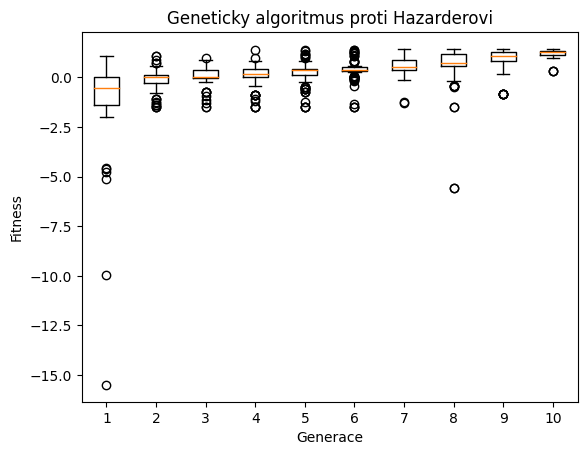

In [3]:
boxplot("gs_hazard", "Geneticky algoritmus proti Hazarderovi")

In [ ]:
folders = ["gs_callmachine", "gs_hazard", "gs_evicka", "gs_cheater_hands", "gs_cheater_community", "gs_cheater"]
for folder in folders:
    boxplot(folder)

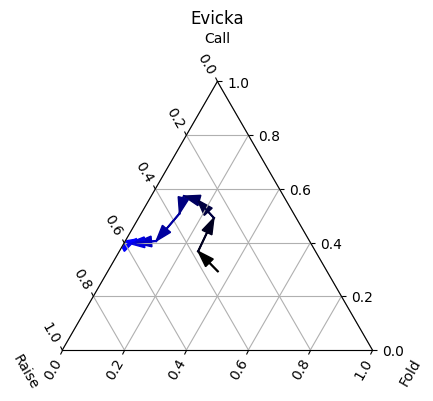

In [ ]:
def get_actions(foldername):
    data = {i: {"call": 0, "raise": 0, "fold": 0} for i in range(10)}
    for i in range(10):
        with open(f"./bots/{foldername}/gen{i}.json", "r") as file:
            bots = json.load(file)
            for bot in bots:
                for condition in bot["conditions"]:
                    action = condition["action"]
                    data[i][action] += 1
    return data

# Mixovani barev, zdroj: https://stackoverflow.com/questions/73314297/simplest-example-of-linear-interpolation-for-color-in-python
def mix(col0, col1, ratio):
    return tuple(cmp0*ratio+cmp1*(1-ratio)
        for cmp0, cmp1 in zip(col0, col1))
black, blue = to_rgb("black"), to_rgb("blue")

def triangle_plot(fig, foldername, opponent, position):
    data = get_actions(foldername)
    x = [d["call"] for d in data.values()]
    y = [d["raise"] for d in data.values()]
    z = [d["fold"] for d in data.values()]
    ax = fig.add_subplot(1,1,position, 
                         projection="ternary")
    ax.grid()
    for i, (xi, yi, zi) in enumerate(zip(x, y, z)):
        if i < len(x) - 1:
            path_color = mix(blue, black, i/8)
            ax.plot([xi, x[i+1]], [yi, y[i+1]], [zi, z[i+1]], color=path_color)
            arrow_placement = 1
            ax.arrow(xi, yi, zi, 
                     (x[i+1] - xi)*arrow_placement, 
                     (y[i+1] - yi)*arrow_placement, 
                     (z[i+1] - zi)*arrow_placement, 
                     color=path_color, 
                     shape='full', 
                     length_includes_head = True,
                     head_width=0.04)
    ax.set_tlabel('Call')
    ax.set_llabel('Raise')
    ax.set_rlabel('Fold')
    ax.set_title(opponent)

fig = plt.figure(figsize=(5,5))
triangle_plot(fig, "gs_evicka", "", 1)
plt.title("Evicka")
fig.savefig("./images/ternary_single.eps")
plt.show()


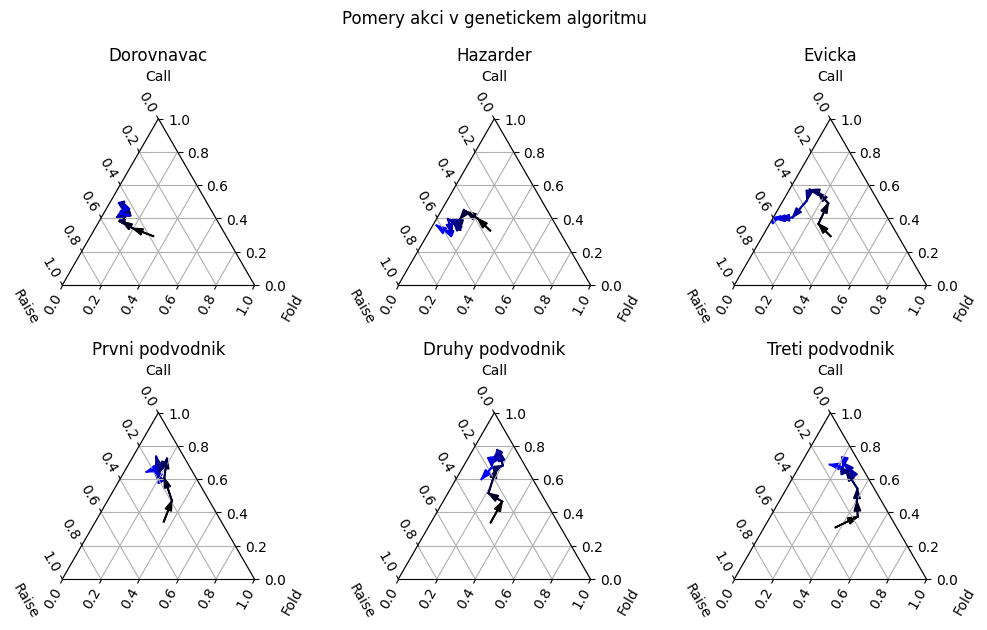

In [70]:
titles = ["Dorovnavac", "Hazarder", "Evicka", "Prvni podvodnik", "Druhy podvodnik", "Treti podvodnik"]
folders = ["gs_callmachine", "gs_hazard", "gs_evicka", "gs_cheater_hands", "gs_cheater_community", "gs_cheater"]
numbers = range(1,7)
fig = plt.figure(figsize=(10.8, 7))
fig.subplots_adjust(
    left=0.1,
    right=0.9,
    wspace=0.75,
)
for folder, opponent, i in zip(folders, titles, numbers):
    triangle_plot(fig, folder, opponent, i)
fig.suptitle("Pomery akci v genetickem algoritmu")
fig.savefig("./images/ternary.eps")
plt.show()